In [109]:
import pandas as pd
athlete_bio=pd.read_csv('files/Olympic_Athlete_Bio.csv')
athletes=pd.read_csv('files/Olympic_Athlete_Event_Results.csv')
country=pd.read_csv('files/Olympics_Games.csv')
olympics_medals=pd.read_csv('files/Olympic_Games_Medal_Tally.csv')
athletes

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,NaN,False
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,NaN,False
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,NaN,False
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,NaN,False
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...
316829,2022 Winter Olympics,62,NED,Bobsleigh,"Monobob, Women",19019671,Karlien Sleper,148662,16,NaN,False
316830,2022 Winter Olympics,62,SVK,Bobsleigh,"Monobob, Women",19019671,Viktória Čerňanská,138683,17,NaN,False
316831,2022 Winter Olympics,62,KOR,Bobsleigh,"Monobob, Women",19019671,Kim Yu-Ran,137542,18,NaN,False
316832,2022 Winter Olympics,62,JAM,Bobsleigh,"Monobob, Women",19019671,Jazmine Fenlator-Victorian,128682,19,NaN,False


In [110]:
# separating each olympics edition
year='1960'
edition=athletes.loc[athletes['edition']>year]#.set_index('edition')



In [111]:
#separating the winter and summer olympics
Winter=edition.loc[edition['edition'].str.contains('Winter')]
Summer=edition.loc[edition['edition'].str.contains('Summer')]
Summer

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport
363,1988 Summer Olympics,22,ARU,Artistic Swimming,"Solo, Women",43507,Roswitha Lopez,44994,18,NaN,False
364,1988 Summer Olympics,22,ARU,Artistic Swimming,"Solo, Women",43507,Yvette Thuis,44995,AC r1/3,NaN,False
365,1988 Summer Olympics,22,ARU,Artistic Swimming,"Duet, Women",43511,Yvette Thuis,44995,15,NaN,True
366,1988 Summer Olympics,22,ARU,Artistic Swimming,"Duet, Women",43511,Roswitha Lopez,44994,15,NaN,True
367,1988 Summer Olympics,22,ARU,Athletics,"100 metres, Women",63682,Evelyn Farrell,64471,8 h7 r1/4,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...
316416,2020 Summer Olympics,61,USA,Wrestling,"Featherweight, Freestyle, Women",19009677,Jacarra Winchester,147307,=5,NaN,False
316417,2020 Summer Olympics,61,USA,Wrestling,"Lightweight, Freestyle, Women",19009706,Helen Maroulis,132194,=3,Bronze,False
316418,2020 Summer Olympics,61,USA,Wrestling,"Middleweight, Freestyle, Women",19009735,Kayla Miracle,147308,12,NaN,False
316419,2020 Summer Olympics,61,USA,Wrestling,"Light-Heavyweight, Freestyle, Women",19009764,Tamyra Mensah-Stock,147310,1,Gold,False


In [112]:
#create a new column for the years for the winter and summer olympics
Winter['year']=Winter['edition'].str.extract(r'(.*?)(?=\sWinter)', expand=False)
Summer['year']=Summer['edition'].str.extract(r'(.*?)(?=\sSummer)', expand=False)

C:\Users\tristan\AppData\Local\Temp\ipykernel_12596\797483816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Winter['year']=Winter['edition'].str.extract(r'(.*?)(?=\sWinter)', expand=False)
C:\Users\tristan\AppData\Local\Temp\ipykernel_12596\797483816.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Summer['year']=Summer['edition'].str.extract(r'(.*?)(?=\sSummer)', expand=False)


In [113]:
#counting the number of participants in each olympics
participantswinter=pd.DataFrame(Winter.groupby(['year'])['athlete'].count())
participantssummer=pd.DataFrame(Summer.groupby(['year'])['athlete'].count())


In [114]:
#renaming the columns athlete to total athletes
participantswinter=participantswinter.rename(columns={'athlete':'total athletes'})
participantssummer=participantssummer.rename(columns={'athlete':'total athletes'})


<Axes: title={'center': 'Number of participants in Winter Olympics'}, xlabel='year'>

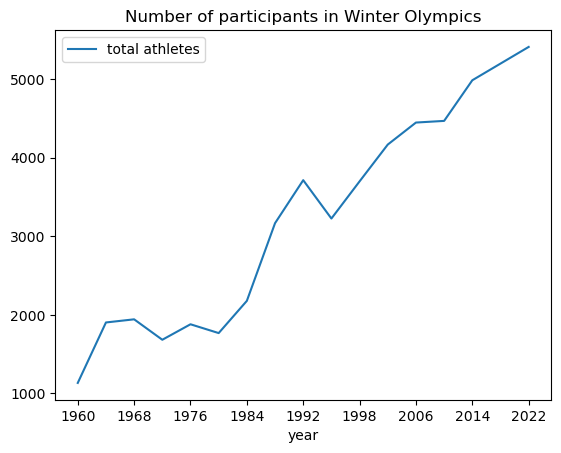

In [115]:
#plotting the winter data
participantswinter.plot(title='Number of participants in Winter Olympics')

<Axes: title={'center': 'Number of participants in Summer Olympics'}, xlabel='year'>

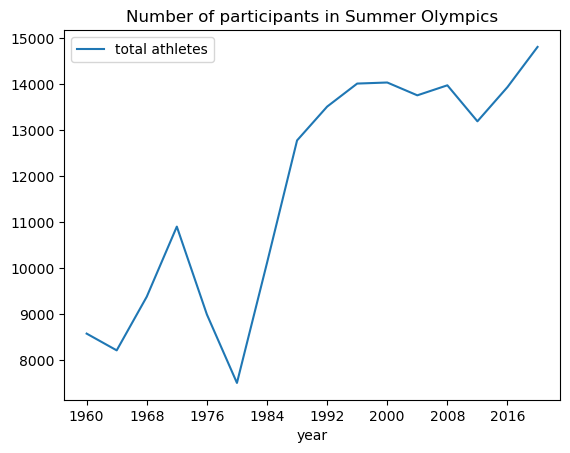

In [116]:
#plotting the summer data

participantssummer.plot(title='Number of participants in Summer Olympics')

<Axes: title={'center': 'Number of sports in Winter Olympics'}, xlabel='year'>

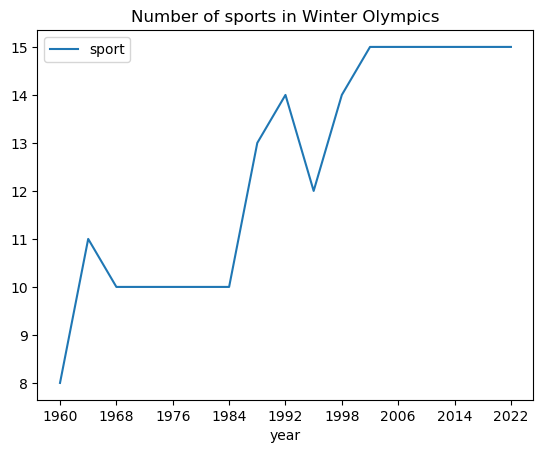

In [117]:
#let's see the number of sports in each winter olympics edition
wintersports=pd.DataFrame(Winter.groupby(['year'])['sport'].nunique())
wintersports.plot(title='Number of sports in Winter Olympics')

<Axes: title={'center': 'Number of sports in each Summer Olympics edition'}, xlabel='year'>

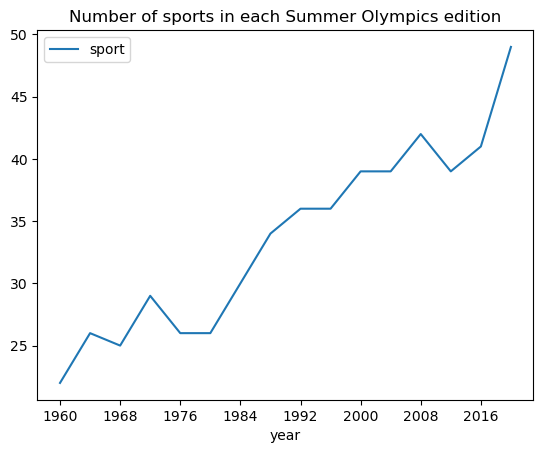

In [118]:
#plotting the data for summer olympics sports
summersports=pd.DataFrame(Summer.groupby(['year'])['sport'].nunique())
summersports.plot(title='Number of sports in each Summer Olympics edition')

In [204]:
#lets see the sports that are played in each winter olympics edition
add=Winter.groupby(['year'])['sport'].unique()
add=add.reset_index()
sportsadded={}
sportsremoved={}
i=0
for year in add['year']:
    for sport in add['sport'][i]:
        
    
    

    
         
                

IndentationError: expected an indented block after 'for' statement on line 8 (3619702106.py, line 10)